___
#### 정확성
```python
우선 boxplot으로 이상치의 존재 여부 확인
이상치 존재 시
: 이상치 삭제
1) 25%, 75% 지점 확인
- 방법 1: df['컬럼명'].describe()
- 방법 2: df['컬럼명'].quantile(0.25)
            > 25% 지점을 출력해줌.
            > 변수에 저장하고 사용하기 좋다.

2) IQR 구하기
- IQR은 Q3에서 Q1을 뺀 값.

3) 이상치의 조건 설정하기.
- (df['컬럼명'] < q1 - iqr*1.5) | (df['컬럼명'] > q3 + iqr*1.5)
    > 컬럼의 데이터가 Q1-(IQR*1.5)보다 작거나, Q3+(IQR*1.5)보다 크면 이상치.
    > Pandas Series.
    > 해당 조건을 변수에 저장하고 인덱싱하면 이상치인 행을 출력할 수 있다.


< 주로 사용하는 이상치 삭제 플로우 >
q1 = df['컬럼명'].quantile(0.25)
q3 = df['컬럼명'].quantile(0.75)
iqr = q3 - q1

# 이상치 설정
condition = (df['컬럼명'] < q1 - iqr*1.5) | (df['컬럼명'] > q3 + iqr*1.5)
df[condition]
-> 해당 데이터가 잘못 입력됐다면 수정.
-> 아예 이상한 데이터가 잘못 들어온 거면 삭제.

# 삭제
df[condition].index  # 조건에 해당하는, 즉 이상치인 행의 인덱스를 출력
df.drop(df[condition].index, inplace=True)  # 행 삭제

-> 다시 condition~df[condition] 이 코드 실행해서 제대로 된 건지 확인.
-> boxplot 다시 그려서 이상치가 제대로 수정/삭제 되었는지 확인.
```
___

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/beer.csv', index_col=0)
df.head()

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
4,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0


<Axes: >

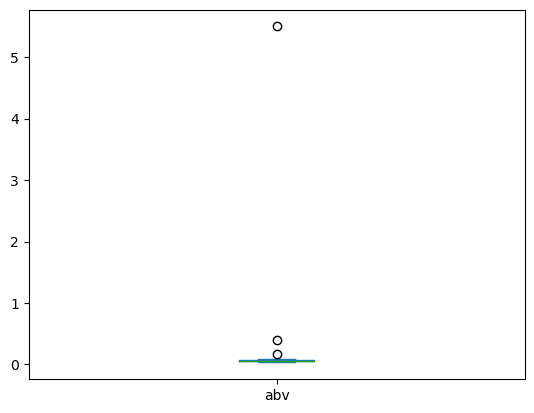

In [3]:
# abv(알코올 도수)로 박스 플롯
df.plot(kind='box', y='abv')

이상치 기준 설정

In [4]:
# 25% 지점, 75% 지점 확인
df['abv'].describe()

count    2190.000000
mean        0.060186
std         0.117010
min         0.032000
25%         0.050000
50%         0.055000
75%         0.065000
max         5.500000
Name: abv, dtype: float64

In [5]:
q1 = df['abv'].quantile(0.25)
q3 = df['abv'].quantile(0.75)
iqr = q3 - q1

In [8]:
# Q1 - (IQR*1.5) 미만이거나, Q3 + (IQR*1.5)를 초과 -> 이상치.
condition = (df['abv'] < q1 - 1.5 * iqr) | (df['abv'] > q3 + 1.5 * iqr)  # Pandas Series

In [9]:
df[condition]
# 963, 1856: 소주인데 잘못 들어감. ~> 삭제
# 2250: 맥주는 맞는데 데이터를 잘못 입력함. ~> 데이터를 수정만 해 주면 된다.

,abv,ibu,id,name,style,brewery_id,ounces
963,0.172,NaN,3691,Chamisul Fresh,Soju,993,12.17
1856,0.400,NaN,3012,Grey Goose,Vodka,893,25.26
2250,5.500,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.00


- 잘못 입력된 데이터 수정

In [10]:
# 잘못 입력한 데이터 수정
df.loc[2250, 'abv'] = 0.055

In [13]:
# 수정 후 다시 확인
condition = (df['abv'] < q1 - 1.5 * iqr) | (df['abv'] > q3 + 1.5 * iqr)
df[condition]

,abv,ibu,id,name,style,brewery_id,ounces
963,0.172,NaN,3691,Chamisul Fresh,Soju,993,12.17
1856,0.400,NaN,3012,Grey Goose,Vodka,893,25.26


In [14]:
df[condition].index

Index([963, 1856], dtype='int64')

- 이상한 데이터 삭제

In [15]:
# 이상한 데이터 삭제.
df.drop(df[condition].index, inplace=True)

In [16]:
# 수정 후 다시 확인
condition = (df['abv'] < q1 - 1.5 * iqr) | (df['abv'] > q3 + 1.5 * iqr)
df[condition]

,abv,ibu,id,name,style,brewery_id,ounces


<Axes: >

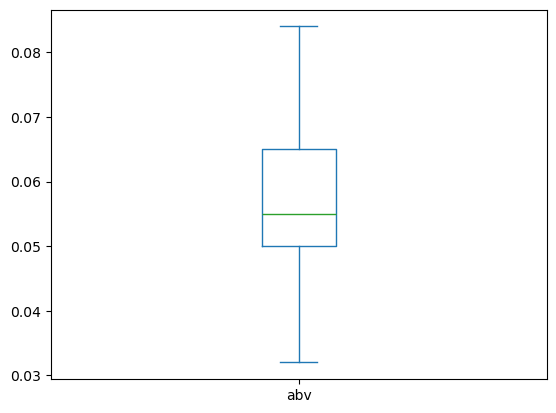

In [17]:
df.plot(kind='box', y='abv')